# 📊 Predição de Aluguel de Bicicletas em Seul – Atividade Somativa 1

Este notebook foi desenvolvido como parte de um processo seletivo para estágio (fictício) em uma grande consultoria. O objetivo é aplicar técnicas de **Machine Learning supervisionado** para prever a quantidade de bicicletas alugadas em Seul, com base em variáveis meteorológicas e temporais.

Foram utilizadas ferramentas como **Pandas**, **Matplotlib**, **Seaborn** e **Scikit-Learn**, além de bibliotecas de regressão e seleção de atributos. O foco principal está na demonstração do raciocínio, clareza do processo e qualidade do código.

As etapas seguidas neste projeto foram:

- 📌 **Análise exploratória inicial** do conjunto de dados, com verificação de tipos, estrutura, estatísticas descritivas e distribuição da variável alvo.
- 🧹 **Pré-processamento dos dados**, incluindo:
  - Conversão da data para o tipo `datetime`
  - Extração do mês
  - Conversão da variável `Weekday` para tipo categórico
  - Remoção de colunas redundantes
- 🧠 **Seleção de atributos** com `SelectKBest` e `f_regression`, escolhendo as 8 variáveis mais relevantes para prever a variável alvo.
- 🔀 **Divisão do dataset** em 75% para treino e 25% para teste, com randomização.
- 🤖 **Treinamento de um modelo de Regressão (Random Forest)**, devido à sua robustez e boa capacidade de generalização.
- 📈 **Avaliação do desempenho** com as métricas MAE, RMSE e R².
- 🎯 **Visualização dos resultados**, comparando valores reais e previstos por meio de um gráfico de dispersão.

Este notebook foi elaborado com foco na **organização, explicações claras e boa legibilidade**, para que tanto especialistas quanto pessoas sem familiaridade técnica possam compreender o processo adotado.

---

📅 **Desenvolvido por:** João Meneses  
📌 **Ano:** 2025


In [13]:
## Importação das Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importação do Modelo de Seleção
from sklearn.feature_selection import SelectKBest, f_regression

## Importaçãodo Modelo de Treinamento
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 🔍 Análise Exploratória Inicial

- Verificar as colunas disponíveis
- Analisar tipos de dados
- Verificar se há valores ausentes
- Observar as primeiras linhas do dataset


In [2]:
## Carregamento do Dataset
df = pd.read_excel('seoul_bike_data.xlsx')

## Exibe o nome das colunas, tipo de dados e valores ausentes
print("🔎 Informações gerais do dataset:")
display(df.info())

🔎 Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   8760 non-null   object 
 1   Day                        8760 non-null   int64  
 2   Weekday                    8760 non-null   int64  
 3   Hour                       8760 non-null   int64  
 4   Rented Bike Count          8760 non-null   int64  
 5   Temperature(°C)            8760 non-null   float64
 6   Humidity(%)                8760 non-null   int64  
 7   Wind speed (m/s)           8760 non-null   float64
 8   Visibility (10m)           8760 non-null   int64  
 9   Dew point temperature(°C)  8760 non-null   float64
 10  Solar Radiation (MJ/m2)    8760 non-null   float64
 11  Rainfall(mm)               8760 non-null   float64
 12  Snowfall (cm)              8760 non-null   float64
dtypes: float64(6), 

None

In [3]:
## Verifica se há valores ausentes
df.isnull().sum()

DateTime                     0
Day                          0
Weekday                      0
Hour                         0
Rented Bike Count            0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
dtype: int64

In [4]:
## Mostras as primeiras linhas
df.head()

,DateTime,Day,Weekday,Hour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,2017-01-12 00:00:00,12,5,0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,2017-01-12 01:00:00,12,5,1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2017-01-12 02:00:00,12,5,2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,2017-01-12 03:00:00,12,5,3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,2017-01-12 04:00:00,12,5,4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


## 📊 Estatísticas e Distribuição da Variável Alvo

In [5]:
## Estatísticas da Varíavel que vai ser prevista
df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

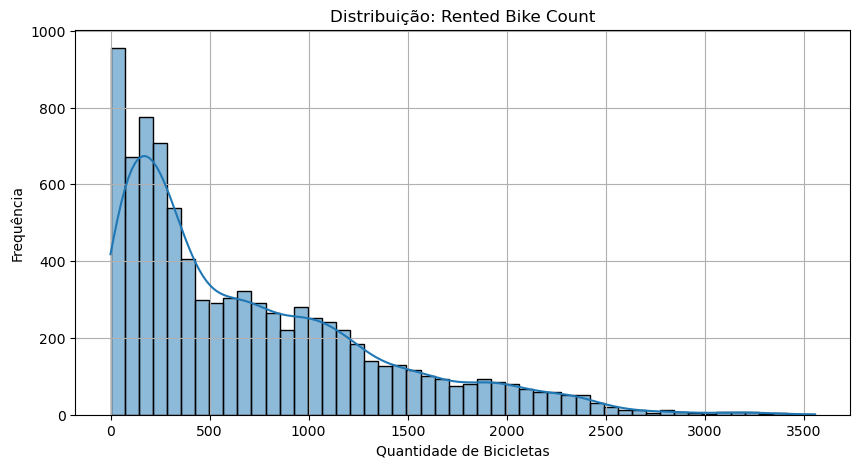

In [6]:
## Gráfico da Variável
plt.figure(figsize=(10, 5))
sns.histplot(df['Rented Bike Count'], bins=50, kde=True)
plt.title('Distribuição: Rented Bike Count')
plt.xlabel('Quantidade de Bicicletas')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

## 🎯 Tipo de Problema

Variável alvo: `Rented Bike Count`  
Tipo: Numérica contínua  
Problema: **Regressão**

## 🧹 Pré-processamento dos Dados (Tratamento dos Dados do Dataset)

- Conversão da coluna `DateTime` para tipo datetime
- Extração do mês como nova variável
- Exclusão da coluna `Day`
- Conversão de `Weekday` para categoria

In [7]:
# Conversão de DateTime para datetime real
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extração do mês (opcionalmente pode-se derivar estação)
df['Month'] = df['DateTime'].dt.month

# Exclusão de coluna redundante
df.drop(columns=['Day'], inplace=True)

# Conversão de Weekday em categoria
df['Weekday'] = df['Weekday'].astype('category')

# Reordenação das colunas (opcional, para clareza visual)
cols = ['DateTime', 'Month', 'Weekday', 'Hour', 'Temperature(°C)', 'Humidity(%)',
        'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
        'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Rented Bike Count']
df = df[cols]

df.head()


,DateTime,Month,Weekday,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,2017-01-12 00:00:00,1,5,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,254
1,2017-01-12 01:00:00,1,5,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,204
2,2017-01-12 02:00:00,1,5,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,173
3,2017-01-12 03:00:00,1,5,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,107
4,2017-01-12 04:00:00,1,5,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,78


## 🧠 Seleção de Atributos
Aplicação da técnica `SelectKBest` com a função `f_regression` para selecionar as variáveis mais relevantes para o modelo de regressão. Essa abordagem avalia, individualmente, a força da relação entre cada variável preditora e a variável alvo (`Rented Bike Count`).

In [9]:
# Separação entre features (X) e target (y)
X = df.drop(columns=['DateTime', 'Rented Bike Count'])
X = pd.get_dummies(X, drop_first=True)  # Converte 'Weekday' em dummies
y = df['Rented Bike Count']

# Aplicação do SelectKBest
selector = SelectKBest(score_func=f_regression, k=8)
X_selected = selector.fit_transform(X, y)

# Recuperando os nomes das variáveis selecionadas
selected_features = X.columns[selector.get_support()].tolist()

print("✅ Atributos selecionados:")
print(selected_features)

✅ Atributos selecionados:
['Hour', 'Temperature(°C)', 'Humidity(%)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


## 🤖 Treinamento do Modelo e Avaliação

Após selecionar os melhores atributos, o dataset foi divido em duas partes: 
- **Treinamento (75%)**, para que o modelo aprenda os padrões dos dados
- **Teste (25%)**, para avaliar o desempenho do modelo em dados não vistos

 O Algoritmo selecionado foi **Random Forest Regressor**, que cria várias árvores de decisão e combina seus resultados para melhorar a precisão.

Por fim, o modelo foi avaliado com métricas apropriadas para regressão:
- **MAE (Erro Absoluto Médio)**: média dos erros absolutos
- **RMSE (Raiz do Erro Quadrático Médio)**: dá mais peso a grandes erros
- **R² (Coeficiente de Determinação)**: indica o quanto o modelo explica a variação dos dados


In [18]:
# Selecionando apenas os atributos escolhidos pela etapa anterior
X_filtered = X[selected_features]

# Divisão em treino (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y, test_size=0.25, random_state=42
)

# Treinamento do modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predições
y_pred = model.predict(X_test)

# Avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

# Exibição dos resultados
print(f"📊 Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"📊 Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"📊 Coeficiente de Determinação (R²): {r2:.2f}")

📊 Erro Absoluto Médio (MAE): 184.93
📊 Raiz do Erro Quadrático Médio (RMSE): 309.11
📊 Coeficiente de Determinação (R²): 0.77


## 📈 Visualização: Valores Reais vs. Valores Previstos

Para facilitar a interpretação do desempenho do modelo, criei um gráfico comparando os valores reais de aluguel de bicicletas com os valores previstos pelo modelo. A linha de tendência ideal seria uma reta em que os pontos reais e previstos coincidissem.

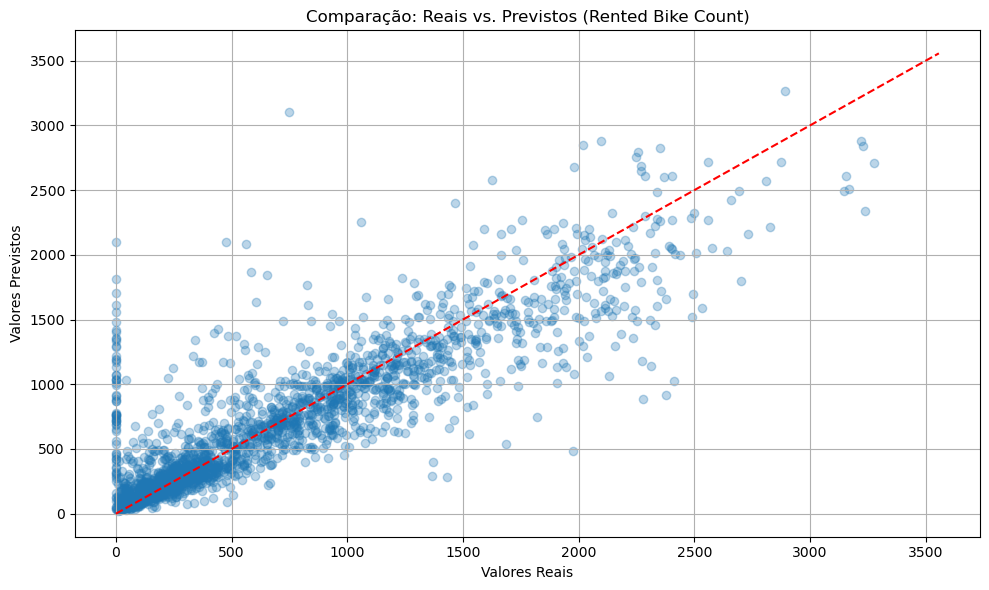

In [19]:
# Comparação entre valores reais e previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação: Reais vs. Previstos (Rented Bike Count)')
plt.grid(True)
plt.tight_layout()
plt.show()